average the 3 scans per location as one inflection point and create a box and whisker plot of these values and overlay the raw points on top of the boxplot. there should be 4 box and whisker plots (below code)

data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None


ValueError: x and y must be the same size

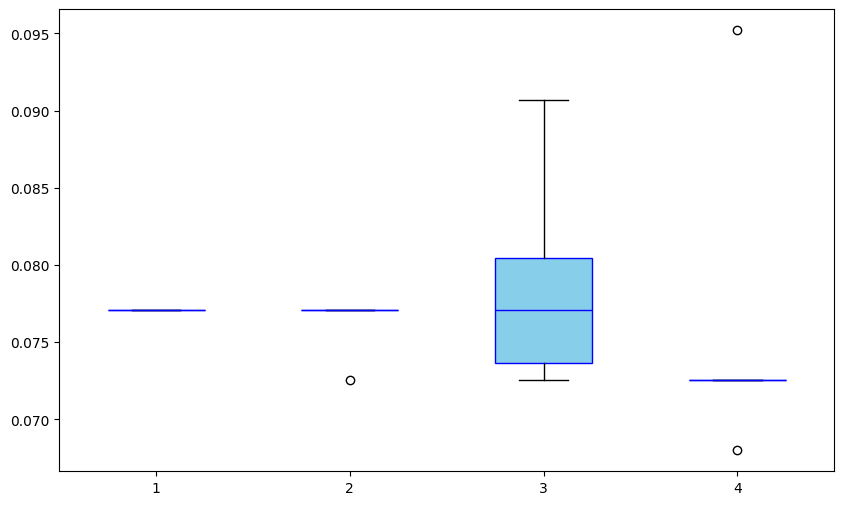

In [3]:
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store inflection points (depth and intensity) per location
save_inflection_point_depth = []
save_inflection_point_intensity = []

# Example for Vivosight and Epidermal Data
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

subject_id = "A52"
subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

# Group the inflection points by location
location_dict = {1: [], 2: [], 3: [], 4: []}  # Assuming 4 locations (1-4)

# Loop through each dermal scan and process the inflection points
for derm_scan in subject_data.visit.epidermal:
    derm_scan.get_normalize_a_scan()
    
    # Try approach 1
    derm_scan.approach_1(15)
    if derm_scan.min_location_index is None:
        derm_scan.approach_2(15, 200)

    # Save the inflection points (depths) and corresponding intensity values
    inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]
    inflection_intensity = derm_scan.depth_data["Mean A-scan"][derm_scan.min_location_index]
    
    # Append the inflection points to the appropriate location
    location_dict[derm_scan.location].append((inflection_depth, inflection_intensity))

# Now, calculate the average inflection points per location
averaged_inflection_points = {
    loc: {
        "depth": np.mean([point[0] for point in points]),
        "intensity": np.mean([point[1] for point in points])
    }
    for loc, points in location_dict.items() if len(points) > 0
}

# Now, let's prepare the data for plotting
depths_per_location = []
intensities_per_location = []
raw_depths = []
raw_intensities = []

for loc, points in location_dict.items():
    depths_per_location.append([point[0] for point in points])
    intensities_per_location.append([point[1] for point in points])
    raw_depths.extend([point[0] for point in points])
    raw_intensities.extend([point[1] for point in points])

# Plotting the boxplot with raw points overlaid
plt.figure(figsize=(10, 6))

# Create the boxplot for depths
plt.boxplot(depths_per_location, positions=[1, 2, 3, 4], widths=0.5, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'), medianprops=dict(color='blue'))

# Overlay raw points for depth
plt.scatter([np.random.normal(loc, 0.05) for loc in [1, 2, 3, 4] for _ in range(len(raw_depths))],
            raw_depths, color='red', label='Raw Depth Points', alpha=0.5)

# Create the boxplot for intensities
plt.boxplot(intensities_per_location, positions=[1, 2, 3, 4], widths=0.5, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'), medianprops=dict(color='green'))

# Overlay raw points for intensity
plt.scatter([np.random.normal(loc, 0.05) for loc in [1, 2, 3, 4] for _ in range(len(raw_intensities))],
            raw_intensities, color='orange', label='Raw Intensity Points', alpha=0.5)

# Set plot labels and title
plt.xlabel("Location")
plt.ylabel("Value")
plt.title("Boxplot of Inflection Points by Location with Raw Data Overlaid")

# Add legend and grid
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Print the averaged inflection points per location
print("Averaged Inflection Points (Depth and Intensity) per Location:")
for loc, stats in averaged_inflection_points.items():
    print(f"Location {loc}: Depth = {stats['depth']}, Intensity = {stats['intensity']}")


In [4]:
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Initialize a list to store inflection point depths
save_inflection_point_depth = []

# Example for Vivosight and Epidermal Data
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

subject_id = "A52"
subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

# Group the inflection points by location
location_dict = {1: [], 2: [], 3: [], 4: []}  # Assuming 4 locations (1-4)

# Loop through each dermal scan and process the inflection points
for derm_scan in subject_data.visit.epidermal:
    derm_scan.get_normalize_a_scan()
    
    # Try approach 1
    derm_scan.approach_1(15)
    if derm_scan.min_location_index is None:
        derm_scan.approach_2(15, 200)

    # Save the inflection points (depths)
    inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]
    
    # Append the inflection points to the appropriate location
    location_dict[derm_scan.location].append(inflection_depth)

# Now, calculate the average inflection points per location
averaged_inflection_points = {
    loc: np.mean(points)
    for loc, points in location_dict.items() if len(points) > 0
}

# Now, let's prepare the data for plotting
depths_per_location = []
raw_depths = []

for loc, points in location_dict.items():
    depths_per_location


data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
